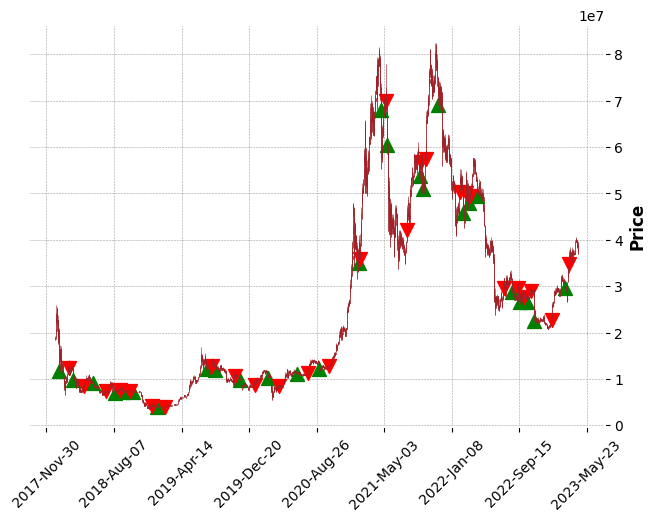

In [2]:
import csv
import pandas as pd
import mplfinance as mpf
import datetime

# CSV 파일 읽기
with open('../out/serialTest5.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    data = [row for row in reader]

# 데이터를 데이터프레임으로 변환
df = pd.DataFrame(data)
df['timestamp'] = df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(int(x) // 1000))
df['open'] = df['open'].astype(float)
df['high'] = df['high'].astype(float)
df['low'] = df['low'].astype(float)
df['close'] = df['close'].astype(float)
df['action'] = df['action'].astype(int)
df = df.set_index('timestamp')

# 2018년 1월 1일 이후의 데이터만 필터링합니다.
start_date = datetime.datetime(2018, 1, 1)
df = df[df.index >= start_date]

# 마커를 추가하기 위해 NaN으로 채운 두 개의 시리즈를 생성합니다.
buy_signals = pd.Series(index=df.index, dtype=float)
sell_signals = pd.Series(index=df.index, dtype=float)

# action 값에 따라 Buy 또는 Sell 시리즈에 해당 인덱스에 종가를 할당합니다.
for index, action in enumerate(df['action']):
    if action == 1:
        buy_signals.iloc[index] = df['close'].iloc[index]
    elif action == 2:
        sell_signals.iloc[index] = df['close'].iloc[index]

# 각 시그널에 대해 addplot 객체를 생성합니다.
buy_plot = mpf.make_addplot(buy_signals, type='scatter', markersize=100, marker='^', color='g')
sell_plot = mpf.make_addplot(sell_signals, type='scatter', markersize=100, marker='v', color='r')

# 캔들스틱 차트와 마커를 함께 그립니다.
mpf.plot(df, type='candle', style='charles', show_nontrading=True, addplot=[buy_plot, sell_plot], warn_too_much_data=10000)
